In [2]:
include("two-level.jl")
using BenchmarkTools
using OrdinaryDiffEq
using PyPlot

In [8]:
function up_and_down(Ωmax, δ, t)
    ψ0 = (1.0+0im, 0.0im)
    ψ1 = evolve(ψ0, TwoLevelPropagator(0, Ωmax / t, δ, 0), t)
    ψ2 = evolve(ψ1, TwoLevelPropagator(Ωmax, -Ωmax / t, δ, 0), t)
    return ψ2
end
get_p1(ψ) = abs2(ψ[1])
get_p2(ψ) = abs2(ψ[2])

get_p2 (generic function with 1 method)

In [18]:
Ωmax = 2π * 400e3
tlen = 100e-6
δs = 2π .* range(-300e3, 300e3, 20000)

-1.8849555921538759e6:188.50498446461083:1.8849555921538759e6

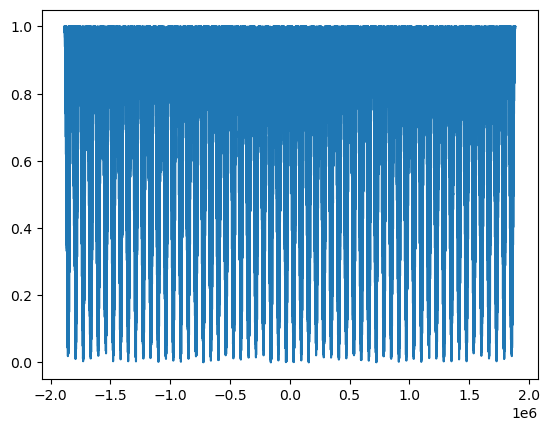

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0xfffe4659cf80>

In [19]:
plot(δs, get_p1.(up_and_down.(Ωmax, δs, tlen)))

In [5]:
@btime sim_LZ(MagnusCalc);
@btime sim_LZ(MagnusCalc, 2);

  676.849 μs (16473 allocations: 1.07 MiB)
  2.708 μs (87 allocations: 5.41 KiB)


In [6]:
@btime sim_LZ(MagnusAnalyticCalc);
@btime sim_LZ(MagnusAnalyticCalc, 2);

  22.957 μs (6 allocations: 39.33 KiB)
  171.917 ns (4 allocations: 224 bytes)


In [7]:
function sim_LZ2(::Type{T}, npoints=1001; kws...) where T
    sys = T(100, 100, -50000, 50000, 10)
    ts, ψs = evolve(sys, npoints; kws...)
end

sim_LZ2 (generic function with 2 methods)

In [8]:
@btime sim_LZ2(LabBasisCalc);
@btime sim_LZ2(LabBasisCalc, 2);
@btime sim_LZ2(LabBasisCalc, alg=Vern7());
@btime sim_LZ2(LabBasisCalc, 2, alg=Vern7());
@btime sim_LZ2(LabBasisCalc, alg=Vern9());
@btime sim_LZ2(LabBasisCalc, 2, alg=Vern9());

  101.803 ms (3141 allocations: 238.75 KiB)
  102.117 ms (129 allocations: 7.92 KiB)
  102.364 ms (17151 allocations: 895.72 KiB)
  101.941 ms (153 allocations: 9.30 KiB)
  96.949 ms (25157 allocations: 1.24 MiB)
  95.631 ms (167 allocations: 10.17 KiB)


In [9]:
@btime sim_LZ2(RotBasisCalc);
@btime sim_LZ2(RotBasisCalc, 2);
@btime sim_LZ2(RotBasisCalc, alg=Vern7());
@btime sim_LZ2(RotBasisCalc, 2, alg=Vern7());
@btime sim_LZ2(RotBasisCalc, alg=Vern9());
@btime sim_LZ2(RotBasisCalc, 2, alg=Vern9());

  208.337 ms (17114 allocations: 550.92 KiB)
  207.877 ms (152 allocations: 8.47 KiB)
  140.026 ms (31124 allocations: 1.18 MiB)
  137.795 ms (176 allocations: 9.84 KiB)
  124.843 ms (39130 allocations: 1.55 MiB)
  123.392 ms (190 allocations: 10.72 KiB)


In [10]:
@btime sim_LZ2(MagnusCalc);
@btime sim_LZ2(MagnusCalc, 2);

  905.135 μs (16093 allocations: 1.16 MiB)
  3.469 μs (87 allocations: 5.41 KiB)


In [11]:
@btime sim_LZ2(MagnusAnalyticCalc);
@btime sim_LZ2(MagnusAnalyticCalc, 2);

  27.915 μs (6 allocations: 39.33 KiB)
  172.885 ns (4 allocations: 224 bytes)
